# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE
    #city_url = f"{url}appid={weather_api_key}&q={city}"
   ## 
     ## city_url = url + "appid=" + weather_api_key + "&q=" + city
      #city_url = f"{url}appid={weather_api_key}&q={city}"
    
    
    ##after looking at the https://openweathermap.org/current its the API key goes after the field(s) to be returned    
    #city_url = url + f"q={city}&appid={weather_api_key}"
    
    #city_url = url + f"q={city}&appid={weather_api_key}&units=imperial"

    city_url = url + f"appid={weather_api_key}&q={city}&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data ###REMEMBER ITS requestS not request IT NEEDS TO PURAL 
        
        city_weather = requests.get(city_url).json()
        
    ##this wed page has the info on the fields - https://openweathermap.org/current

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  ##coord is the key that pulls either long or latitude 
        city_lng = city_weather["coord"]["lon"]  ##coord is the key that pulls either lon or lat 
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | aasiaat
Processing Record 4 of Set 1 | uacu cungo
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | kingscliff
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | morehead city
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | hermosillo
Processing Record 13 of Set 1 | ahau
City not found. Skipping...
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | noshiro
Processing Record 17 of Set 1 | west fargo
Processing Record 18 of Set 1 | kabalo
Processing Record 19 of Set 1 | yangjiang
Processing Record 20 of Set 1 | xining
Processing Record 21

Processing Record 38 of Set 4 | bentiu
Processing Record 39 of Set 4 | kismayo
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | petropavlovsk-kamchatsky
Processing Record 42 of Set 4 | mitu
Processing Record 43 of Set 4 | aioun
Processing Record 44 of Set 4 | magangue
Processing Record 45 of Set 4 | bazar-korgon
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | vadso
Processing Record 48 of Set 4 | monywa
Processing Record 49 of Set 4 | igarka
Processing Record 0 of Set 5 | lompoc
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | fada
Processing Record 3 of Set 5 | vorkuta
Processing Record 4 of Set 5 | arno
Processing Record 5 of Set 5 | berber
Processing Record 6 of Set 5 | al mijlad
Processing Record 7 of Set 5 | neiafu
Processing Record 8 of Set 5 | prado
Processing Record 9 of Set 5 | sequim
Processing Record 10 of Set 5 | walvis bay
Processing Record 11 of Set 5 | tolanaro
Processing Record 12 of Set 5 | bandon
Pro

City not found. Skipping...
Processing Record 33 of Set 8 | mukalla
Processing Record 34 of Set 8 | mandiana
Processing Record 35 of Set 8 | san luis de la loma
Processing Record 36 of Set 8 | antsiranana
Processing Record 37 of Set 8 | itaituba
Processing Record 38 of Set 8 | kidal
Processing Record 39 of Set 8 | cadale
Processing Record 40 of Set 8 | colonia
Processing Record 41 of Set 8 | paulden
Processing Record 42 of Set 8 | nueva palmira
Processing Record 43 of Set 8 | serenje
Processing Record 44 of Set 8 | bel ombre
Processing Record 45 of Set 8 | inverloch
Processing Record 46 of Set 8 | kiiminki
Processing Record 47 of Set 8 | wotho
Processing Record 48 of Set 8 | camocim
Processing Record 49 of Set 8 | yatou
Processing Record 0 of Set 9 | port douglas
Processing Record 1 of Set 9 | lobujya
Processing Record 2 of Set 9 | suva
Processing Record 3 of Set 9 | barrouallie
Processing Record 4 of Set 9 | matoury
Processing Record 5 of Set 9 | kita
Processing Record 6 of Set 9 | fr

Processing Record 24 of Set 12 | port saint john's
Processing Record 25 of Set 12 | kavaratti
Processing Record 26 of Set 12 | deqen
Processing Record 27 of Set 12 | evinayong
Processing Record 28 of Set 12 | san martin
Processing Record 29 of Set 12 | sarigol
Processing Record 30 of Set 12 | ga-kgapane
Processing Record 31 of Set 12 | natal
Processing Record 32 of Set 12 | mega
Processing Record 33 of Set 12 | ko lanta
Processing Record 34 of Set 12 | whistler
Processing Record 35 of Set 12 | uyovu
Processing Record 36 of Set 12 | puerto real
Processing Record 37 of Set 12 | magong
Processing Record 38 of Set 12 | vytegra
Processing Record 39 of Set 12 | luanda
Processing Record 40 of Set 12 | ocean shores
Processing Record 41 of Set 12 | khash
Processing Record 42 of Set 12 | maputo
Processing Record 43 of Set 12 | anyksciai
Processing Record 44 of Set 12 | lata
Processing Record 45 of Set 12 | las tablas
Processing Record 46 of Set 12 | kharp
Processing Record 47 of Set 12 | hancevi

In [53]:
# Convert the cities weather data into a Pandas DataFrame
##MAKE A LIST INTO A DATA FRAME
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [54]:
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=d28c5a38c9e1a5f7a06e5d9c9bfb99bd&q=holbrook&units=metric'

In [55]:
type(city_data)

list

In [56]:
type(city_weather)

dict

In [71]:
city_data[0]

{'City': 'whitehorse',
 'Lat': 60.7161,
 'Lng': -135.0538,
 'Max Temp': 19.5,
 'Humidity': 50,
 'Cloudiness': 75,
 'Wind Speed': 4.02,
 'Country': 'CA',
 'Date': 1691699884}

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,19.50,50,75,4.02,CA,1691699884
1,atafu village,-8.5421,-172.5159,28.29,71,31,5.35,TK,1691699810
2,aasiaat,68.7098,-52.8699,3.28,87,100,4.18,GL,1691699823
3,uacu cungo,-11.3634,15.1208,19.15,63,1,1.02,AO,1691699885
4,ust-nera,64.5667,143.2000,19.00,47,9,0.61,RU,1691699885


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/espos/Documents/DS-BootCamp/6-Python-APIs-6-Challenge/output_data/cities.csv", index_label="City_ID")
##FIGURE OUT THE ... THING 
"C:/Users/espos/Documents/DS-BootCamp/6-Python-APIs-6-Challenge/output_data"

'C:/Users/espos/Documents/DS-BootCamp/6-Python-APIs-6-Challenge/output_data'

In [59]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/espos/Documents/DS-BootCamp/6-Python-APIs-6-Challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,67.10,51,75,9.22,CA,1691697438
1,atafu village,-8.5421,-172.5159,82.96,70,23,12.44,TK,1691697727
2,aasiaat,68.7098,-52.8699,37.71,89,100,11.23,GL,1691697727
3,uacu cungo,-11.3634,15.1208,67.55,57,1,3.18,AO,1691697728
4,ust-nera,64.5667,143.2000,63.10,59,9,1.34,RU,1691697728


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

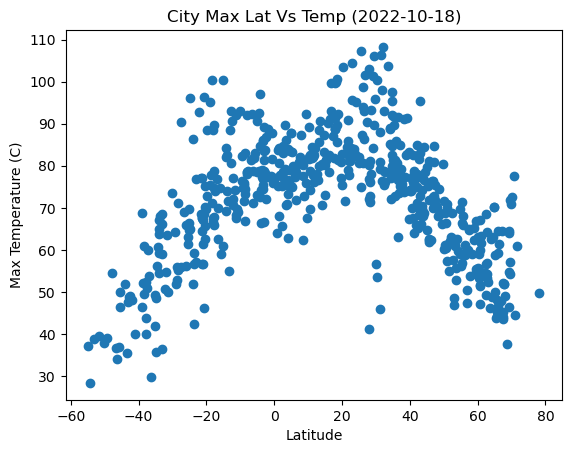

In [72]:
# Build scatter plot for latitude vs. temperature
#lat vs Max Temp
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Lat Vs Temp (2022-10-18)')
# Save the figure
plt.savefig("C:/Users/espos/Documents/DS-BootCamp/6-Python-APIs-6-Challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

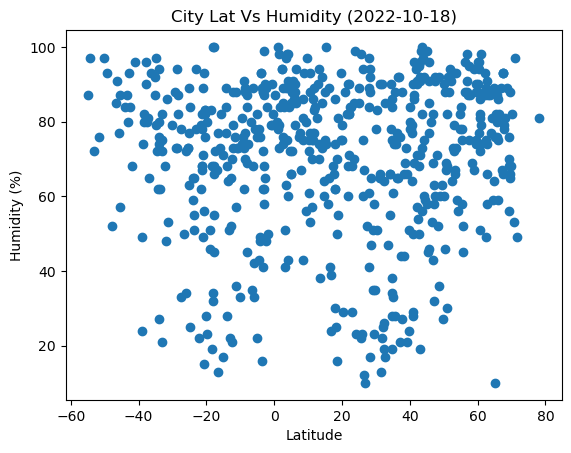

In [73]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Lat Vs Humidity (2022-10-18)')
# Save the figure
plt.savefig("C:/Users/espos/Documents/DS-BootCamp/6-Python-APIs-6-Challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

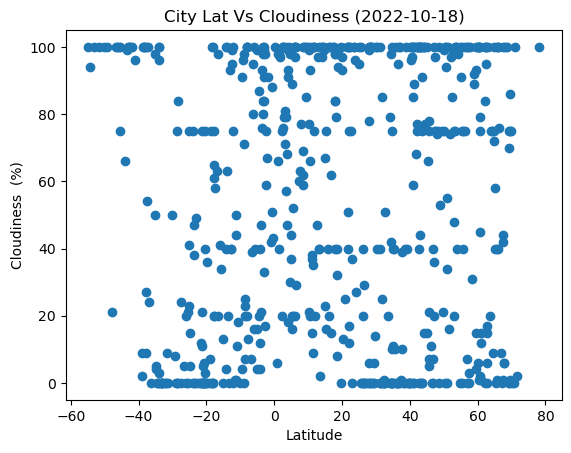

In [74]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness  (%)')
plt.title('City Lat Vs Cloudiness (2022-10-18)')
# Save the figure
plt.savefig("C:/Users/espos/Documents/DS-BootCamp/6-Python-APIs-6-Challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

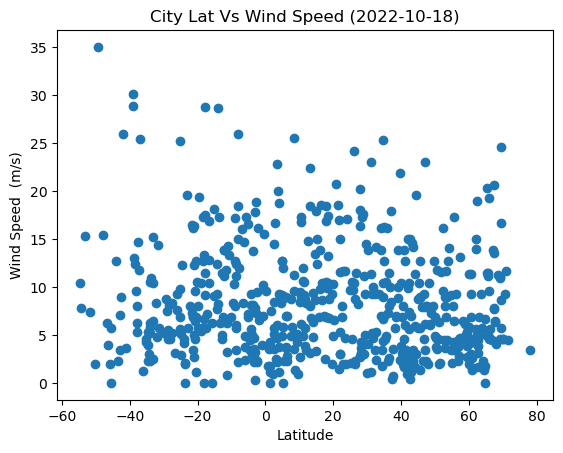

In [75]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed  (m/s)')
plt.title('City Lat Vs Wind Speed (2022-10-18)')
# Save the figure
plt.savefig("C:/Users/espos/Documents/DS-BootCamp/6-Python-APIs-6-Challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def my_lregress_fx():
    print("hello - i can create a fx but not sure - how to complete the function for this requirment")
my_lregress_fx()

hello - i can create a fx but not sure - how to complete the function for this requirment


In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE  ###example  
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,67.10,51,75,9.22,CA,1691697438
2,aasiaat,68.7098,-52.8699,37.71,89,100,11.23,GL,1691697727
4,ust-nera,64.5667,143.2000,63.10,59,9,1.34,RU,1691697728
5,broome,42.2506,-75.8330,71.19,90,100,10.36,US,1691697728
7,morehead city,34.7229,-76.7260,82.45,86,0,25.32,US,1691697512


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,82.96,70,23,12.44,TK,1691697727
3,uacu cungo,-11.3634,15.1208,67.55,57,1,3.18,AO,1691697728
6,kingscliff,-28.2667,153.5667,55.20,82,0,4.61,AU,1691697729
14,kabalo,-6.0500,26.9167,82.08,33,16,4.85,CD,1691697731
17,sao felix do xingu,-6.6447,-51.9950,92.23,35,39,8.37,BR,1691697732


###  Temperature vs. Latitude Linear Regression Plot

In [39]:
tl_slope 

-0.013077651230393256

In [40]:
tl_int

8.757840666518044

In [41]:
tl_line

'y = -0.01x + 8.76'

In [42]:
tl_r

-0.028293718567992322

-0.6464868015991819


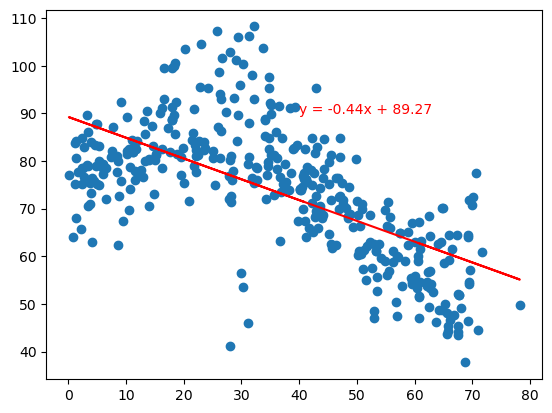

In [80]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression on temp versus lat (TL)
(tl_slope, tl_int, tl_r, tl_p, tl_std_err) = linregress(x_values, y_values)


# Create equation of line to calculate on temp versus lat (TL)
#pretty format to print formula for the line
tl_line = "y = " + str(round(tl_slope,2)) + "x + " + str(round(tl_int,2))

# Create regression value for x 
tl_regress = x_values * tl_slope + tl_int

#always start with scatter plot
plt.scatter(x_values,y_values )

##draws the line
plt.plot(x_values, tl_regress, "r-" )
#write the formula
plt.annotate(tl_line,(40,90),color='red' )
#write the result of the r value
print(tl_r)

# Show plot
plt.show()

0.7726249495787504


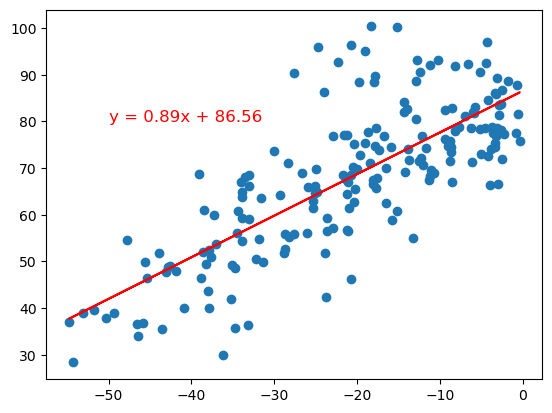

In [81]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
 
# Perform a linear regression on temp versus lat (TL)
(tl_slope, tl_int, tl_r, tl_p, tl_std_err) = linregress(x_values, y_values)


# Create equation of line to calculate on temp versus lat (TL)
#pretty format to print formula for the line
tl_line = "y = " + str(round(tl_slope,2)) + "x + " + str(round(tl_int,2))

# Create regression value for x 
tl_regress = x_values * tl_slope + tl_int

#always start with scatter plot
plt.scatter(x_values,y_values )

##draws the line
plt.plot(x_values, tl_regress, "r-" )
#write the formula
plt.annotate(tl_line,(-50,80),fontsize=12,color="red")
#write the result of the r value
print(tl_r)
# Show plot
plt.show()

**Discussion about the linear relationship:** the data points are close the line and therefore a colloration exists between where the city is located and the weather.

### Humidity vs. Latitude Linear Regression Plot

0.02298042473022368


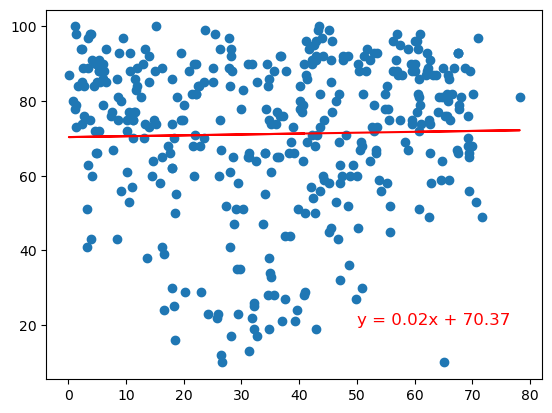

In [89]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

 
# Perform a linear regression on temp versus lat (TL)
(tl_slope, tl_int, tl_r, tl_p, tl_std_err) = linregress(x_values, y_values)


# Create equation of line to calculate on temp versus lat (TL)
#pretty format to print formula for the line
tl_line = "y = " + str(round(tl_slope,2)) + "x + " + str(round(tl_int,2))

# Create regression value for x 
tl_regress = x_values * tl_slope + tl_int

#always start with scatter plot
plt.scatter(x_values,y_values )

##draws the line
plt.plot(x_values, tl_regress, "r-" )
#write the result of the r value
print(tl_r)
#write the formula
plt.annotate(tl_line,(50,20),fontsize=12,color="red")
# Show plot
plt.show()

-0.1626067675293906


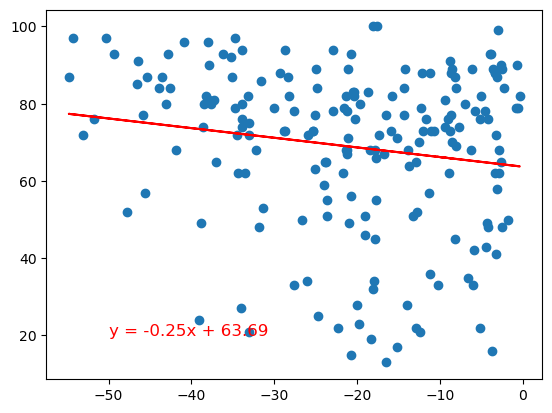

In [90]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

 
# Perform a linear regression on temp versus lat (TL)
(tl_slope, tl_int, tl_r, tl_p, tl_std_err) = linregress(x_values, y_values)


# Create equation of line to calculate on temp versus lat (TL)
#pretty format to print formula for the line
tl_line = "y = " + str(round(tl_slope,2)) + "x + " + str(round(tl_int,2))

# Create regression value for x 
tl_regress = x_values * tl_slope + tl_int

#always start with scatter plot
plt.scatter(x_values,y_values )

##draws the line
plt.plot(x_values, tl_regress, "r-" )
#write the result of the r value
print(tl_r)
#write the formula
plt.annotate(tl_line,(-50,20),fontsize=12,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

-0.11658597294146623


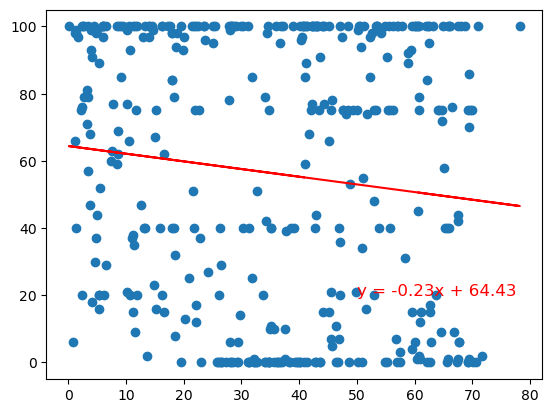

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']


 
# Perform a linear regression on temp versus lat (TL)
(tl_slope, tl_int, tl_r, tl_p, tl_std_err) = linregress(x_values, y_values)


# Create equation of line to calculate on temp versus lat (TL)
#pretty format to print formula for the line
tl_line = "y = " + str(round(tl_slope,2)) + "x + " + str(round(tl_int,2))

# Create regression value for x 
tl_regress = x_values * tl_slope + tl_int

#always start with scatter plot
plt.scatter(x_values,y_values )

##draws the line
plt.plot(x_values, tl_regress, "r-" )
#write the result of the r value
print(tl_r)
#write the formula
plt.annotate(tl_line,(50,20),fontsize=12,color="red")
# Show plot
plt.show()

-0.046731523746096675


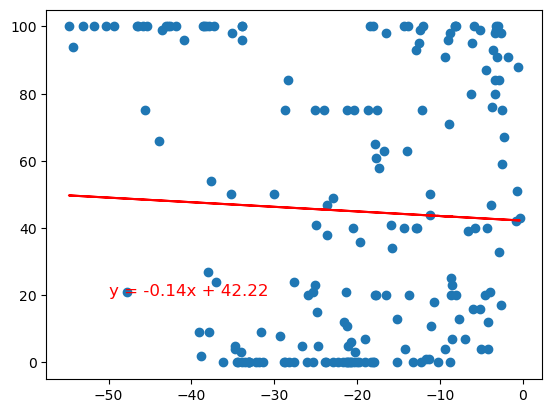

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
 
# Perform a linear regression on temp versus lat (TL)
(tl_slope, tl_int, tl_r, tl_p, tl_std_err) = linregress(x_values, y_values)


# Create equation of line to calculate on temp versus lat (TL)
#pretty format to print formula for the line
tl_line = "y = " + str(round(tl_slope,2)) + "x + " + str(round(tl_int,2))

# Create regression value for x 
tl_regress = x_values * tl_slope + tl_int

#always start with scatter plot
plt.scatter(x_values,y_values )

##draws the line
plt.plot(x_values, tl_regress, "r-" )
#write the result of the r value
print(tl_r)
#write the formula
plt.annotate(tl_line,(-50,20),fontsize=12,color="red")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

-0.06861013950311079


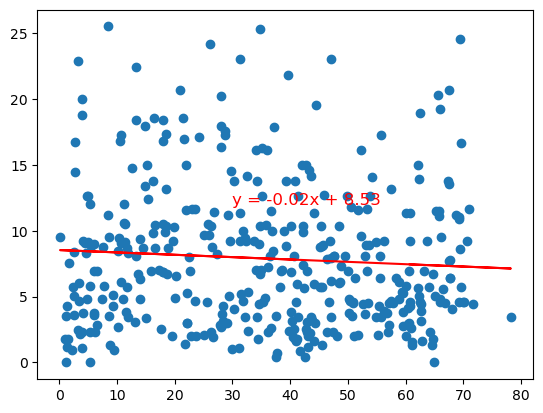

In [93]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

 
# Perform a linear regression on temp versus lat (TL)
(tl_slope, tl_int, tl_r, tl_p, tl_std_err) = linregress(x_values, y_values)


# Create equation of line to calculate on temp versus lat (TL)
#pretty format to print formula for the line
tl_line = "y = " + str(round(tl_slope,2)) + "x + " + str(round(tl_int,2))

# Create regression value for x 
tl_regress = x_values * tl_slope + tl_int

#always start with scatter plot
plt.scatter(x_values,y_values )

##draws the line
plt.plot(x_values, tl_regress, "r-" )
#write the result of the r value
print(tl_r)
#write the formula
plt.annotate(tl_line,(30,12),fontsize=12,color="red")

# Show plot
plt.show()

-0.028293718567992322


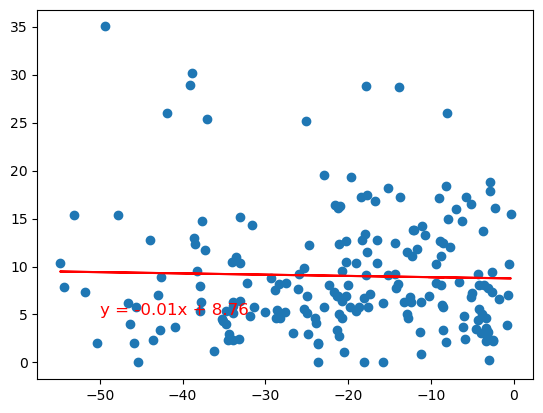

In [94]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

 
# Perform a linear regression on temp versus lat (TL)
(tl_slope, tl_int, tl_r, tl_p, tl_std_err) = linregress(x_values, y_values)


# Create equation of line to calculate on temp versus lat (TL)
#pretty format to print formula for the line
tl_line = "y = " + str(round(tl_slope,2)) + "x + " + str(round(tl_int,2))

# Create regression value for x 
tl_regress = x_values * tl_slope + tl_int

#always start with scatter plot
plt.scatter(x_values,y_values )

##draws the line
plt.plot(x_values, tl_regress, "r-" )
#write the result of the r value
print(tl_r)
#write the formula
plt.annotate(tl_line,(-50,5),fontsize=12,color="red")
# Show plot
plt.show()

**Discussion about the linear relationship:** the north and south hemispheres have opposite max temperatures.  the data points are close the line and therefore a colloration exists between where the city is located and the temperature.

In [ ]:
the north and south hemispheres have opposite max temperatures.  the data points are close the line and therefore a colloration exists between where the city is located and the temperature.